1. Machine Learning Process
2. Problem Formulation
3. Raw Data
4. Data Preprocessing
    - Cleaning
    - Visualizing
    - Analyzing
5. Spliting the data
6. Running Regression
7. Evaluation Metrics

## 1. Machine Learning Process

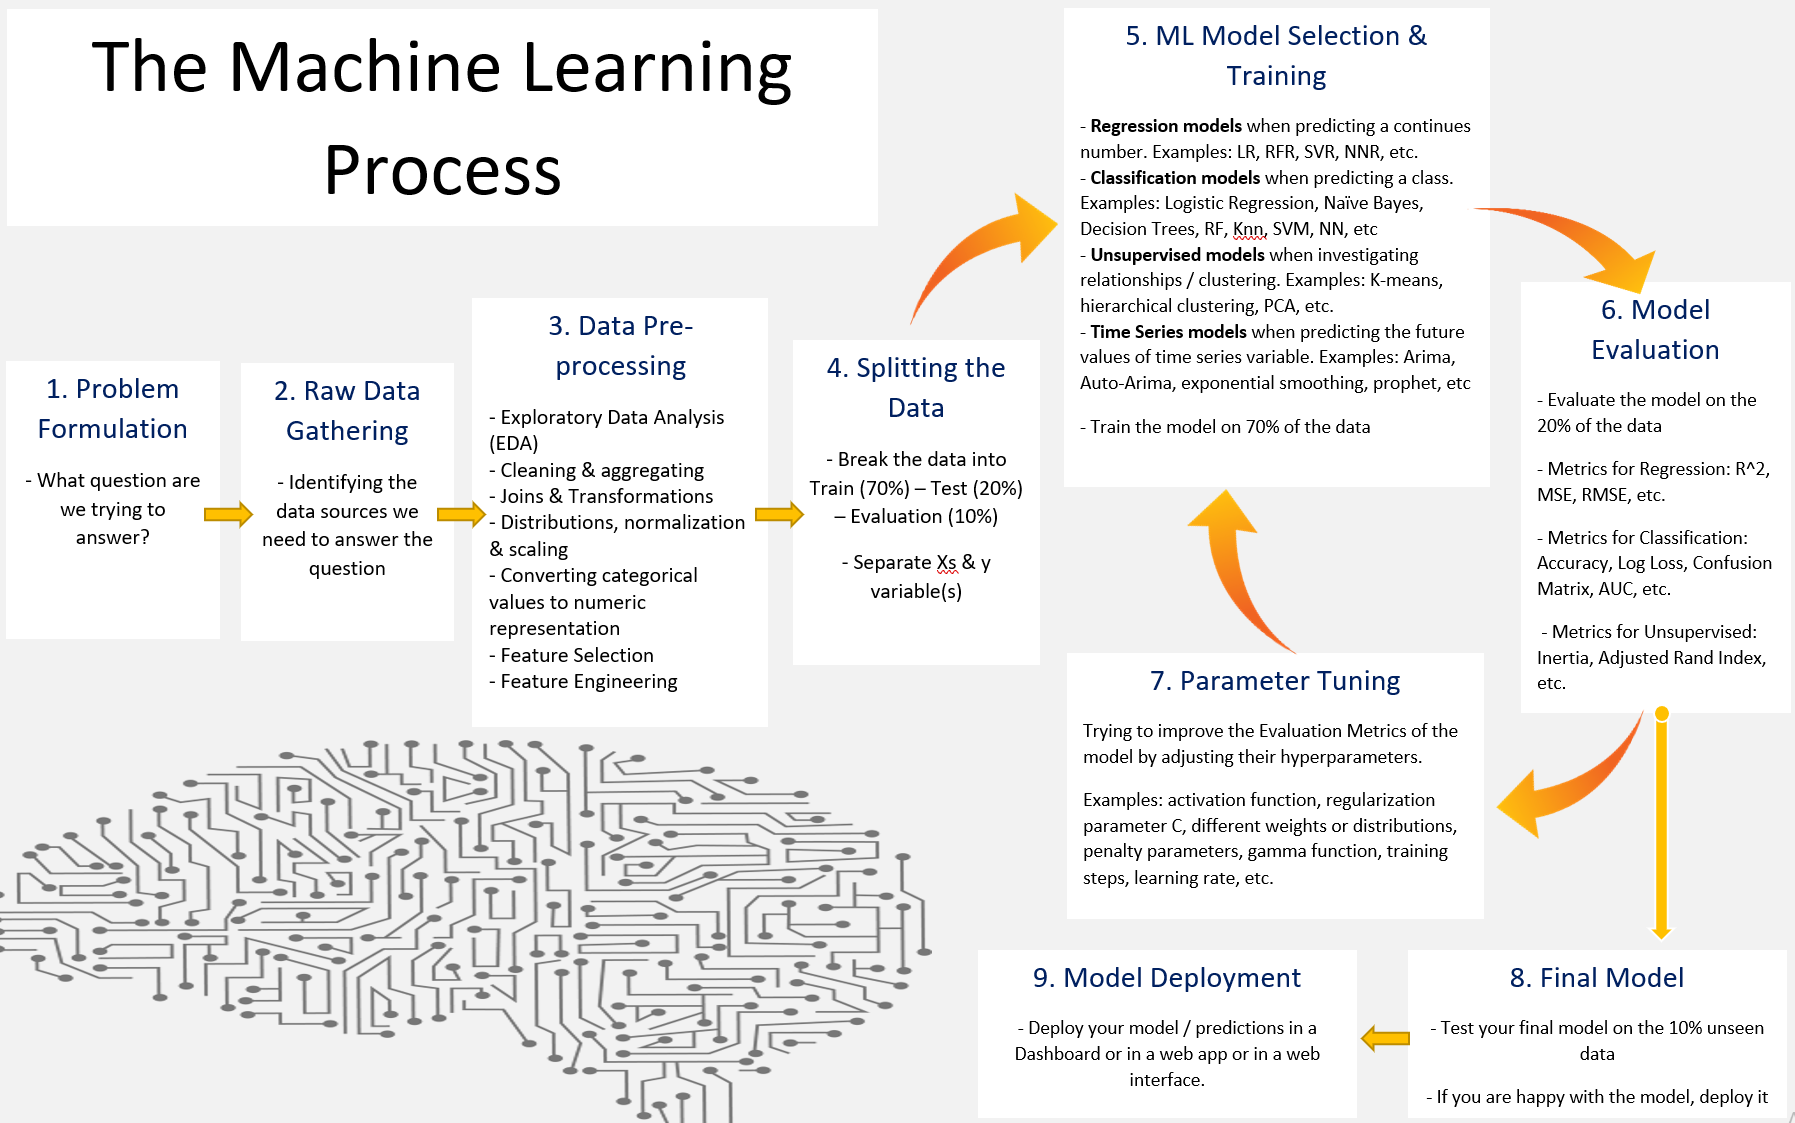

## 2. Problem Formulation

- We want to understand which variables affect the car prices
- We want to be able to predict car prices

## 3. Loading the Raw Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px
import streamlit as st

# loading excel
car_data = pd.read_excel("car_data.xlsx")

# to see your directory: os.getcwd()
pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns

car_data.head()

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


## 4. Data Pre-processing

### 4.1. Understanding our data

In [2]:
# Investigate all the elements whithin each Feature 

for column in car_data:
    unique_vals = np.unique(car_data[column].fillna('0').astype(str))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature index :1610
The number of values for feature Make :7 -- ['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']
The number of values for feature Model :150
The number of values for feature Year :2 -- ['2023' '2024']
The number of values for feature Trim :373
The number of values for feature MSRP :1317
The number of values for feature Invoice Price :944
The number of values for feature Used/New Price :1317
The number of values for feature Body Size :3 -- ['Compact' 'Large' 'Midsize']
The number of values for feature Body Style :12 -- ['Cargo Minivan' 'Cargo Van' 'Convertible' 'Convertible SUV' 'Coupe'
 'Hatchback' 'Passenger Minivan' 'Passenger Van' 'Pickup Truck' 'SUV'
 'Sedan' 'Wagon']
The number of values for feature Cylinders :10 -- ['0' 'I3' 'I4' 'I5' 'I6' 'V10' 'V12' 'V6' 'V8' 'W12']
The number of values for feature Engine Aspiration :6 -- ['Electric Motor' 'Naturally Aspirated' 'Supercharged' 'Turbocharged'
 'Twin-Turbo' 'Twincharg

In [3]:
# Checking for null values
car_data.isnull().sum()

index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64

### 4.2. Dealing with missing values

In [4]:
# droping the columns that have lot's of nulls
car_data = car_data.drop(['Invoice Price', 'Cylinders','Highway Fuel Economy'], axis=1)

In [5]:
# dealing with the columns that have missing values
car_data.head()

# creating a new column just for the number
car_data['Horsepower_No'] = car_data['Horsepower'].str[0:3].astype(float)

# viewing the null values
car_data[car_data['Horsepower_No'].isna()]

# caclulating the mean for ford cars
mean_horsepower = car_data['Horsepower_No'][car_data['Make'] == 'Ford'].mean()

# filling in the null values with the mean
car_data['Horsepower_No'] = car_data['Horsepower_No'].fillna(mean_horsepower)
car_data['Horsepower'] = car_data['Horsepower'].fillna(mean_horsepower)


car_data.isnull().sum()

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Horsepower            0
Torque               27
Horsepower_No         0
dtype: int64

In [6]:
# creating a new column just for the number
car_data['Torque_No'] = car_data['Torque'].str[0:3].astype(float)

# viewing the null values
car_data[car_data['Torque_No'].isna()]

# caclulating the mean for all cars
mean_torque = car_data['Torque_No'].mean()

# filling in the null values with the mean
car_data['Torque_No'] = car_data['Torque_No'].fillna(mean_torque)
car_data['Torque'] = car_data['Torque'].fillna(mean_torque)

car_data.isnull().sum()

index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower           0
Torque               0
Horsepower_No        0
Torque_No            0
dtype: int64

### 4.3. Cleaning the data types

In [7]:
car_data.dtypes

index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                  object
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower            object
Torque                object
Horsepower_No        float64
Torque_No            float64
dtype: object

In [8]:
# cleaning MSRP
car_data['MSRP'] = car_data['MSRP'].str.replace('$','')
car_data['MSRP'] = car_data['MSRP'].str.replace(',','').astype(float)

car_data['Used/New Price'] = car_data['Used/New Price'].str.replace('$','')
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace(',','').astype(float)

### 4.4. Visualizing the data

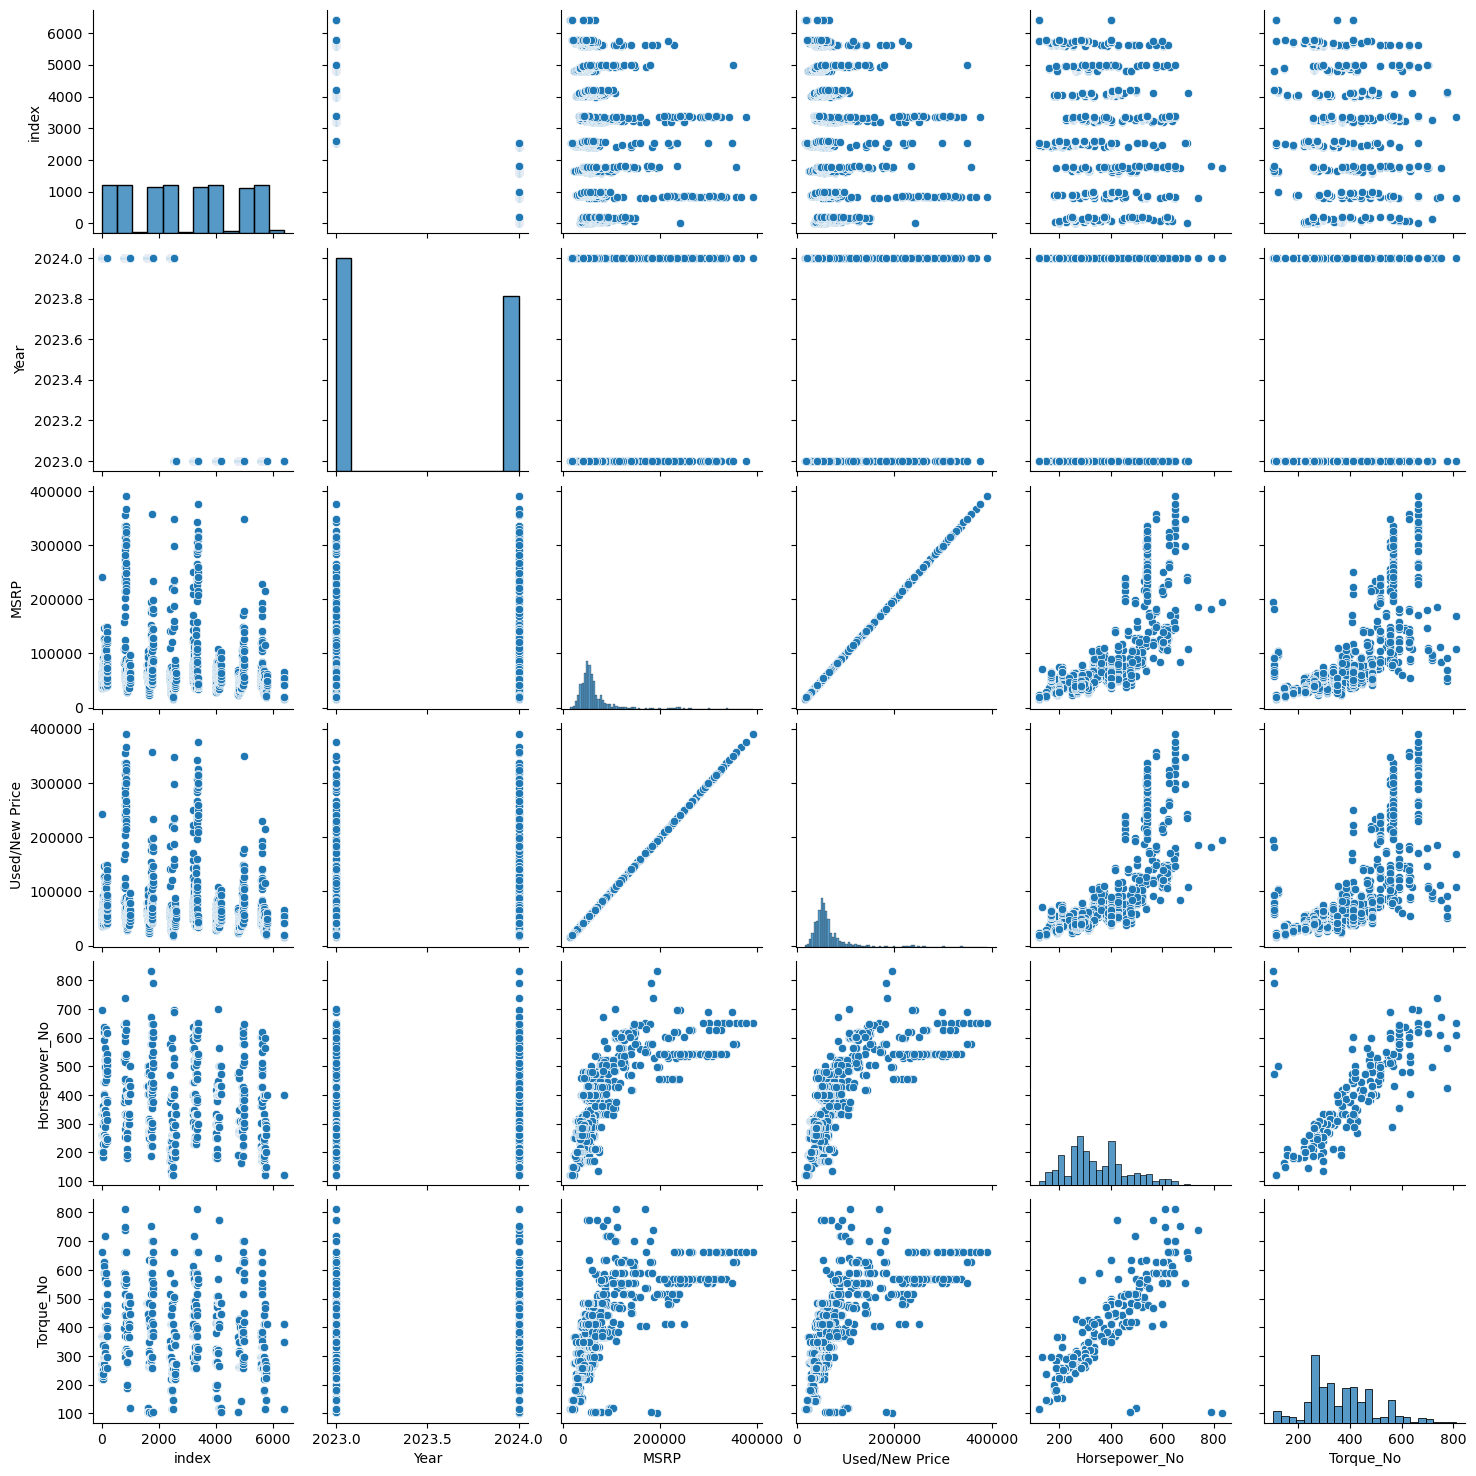

In [9]:
# Example 1 - Visualize the data using seaborn Pairplots
g = sns.pairplot(car_data)

# Notes: Do not run this on a big dataset. Filter the columns first

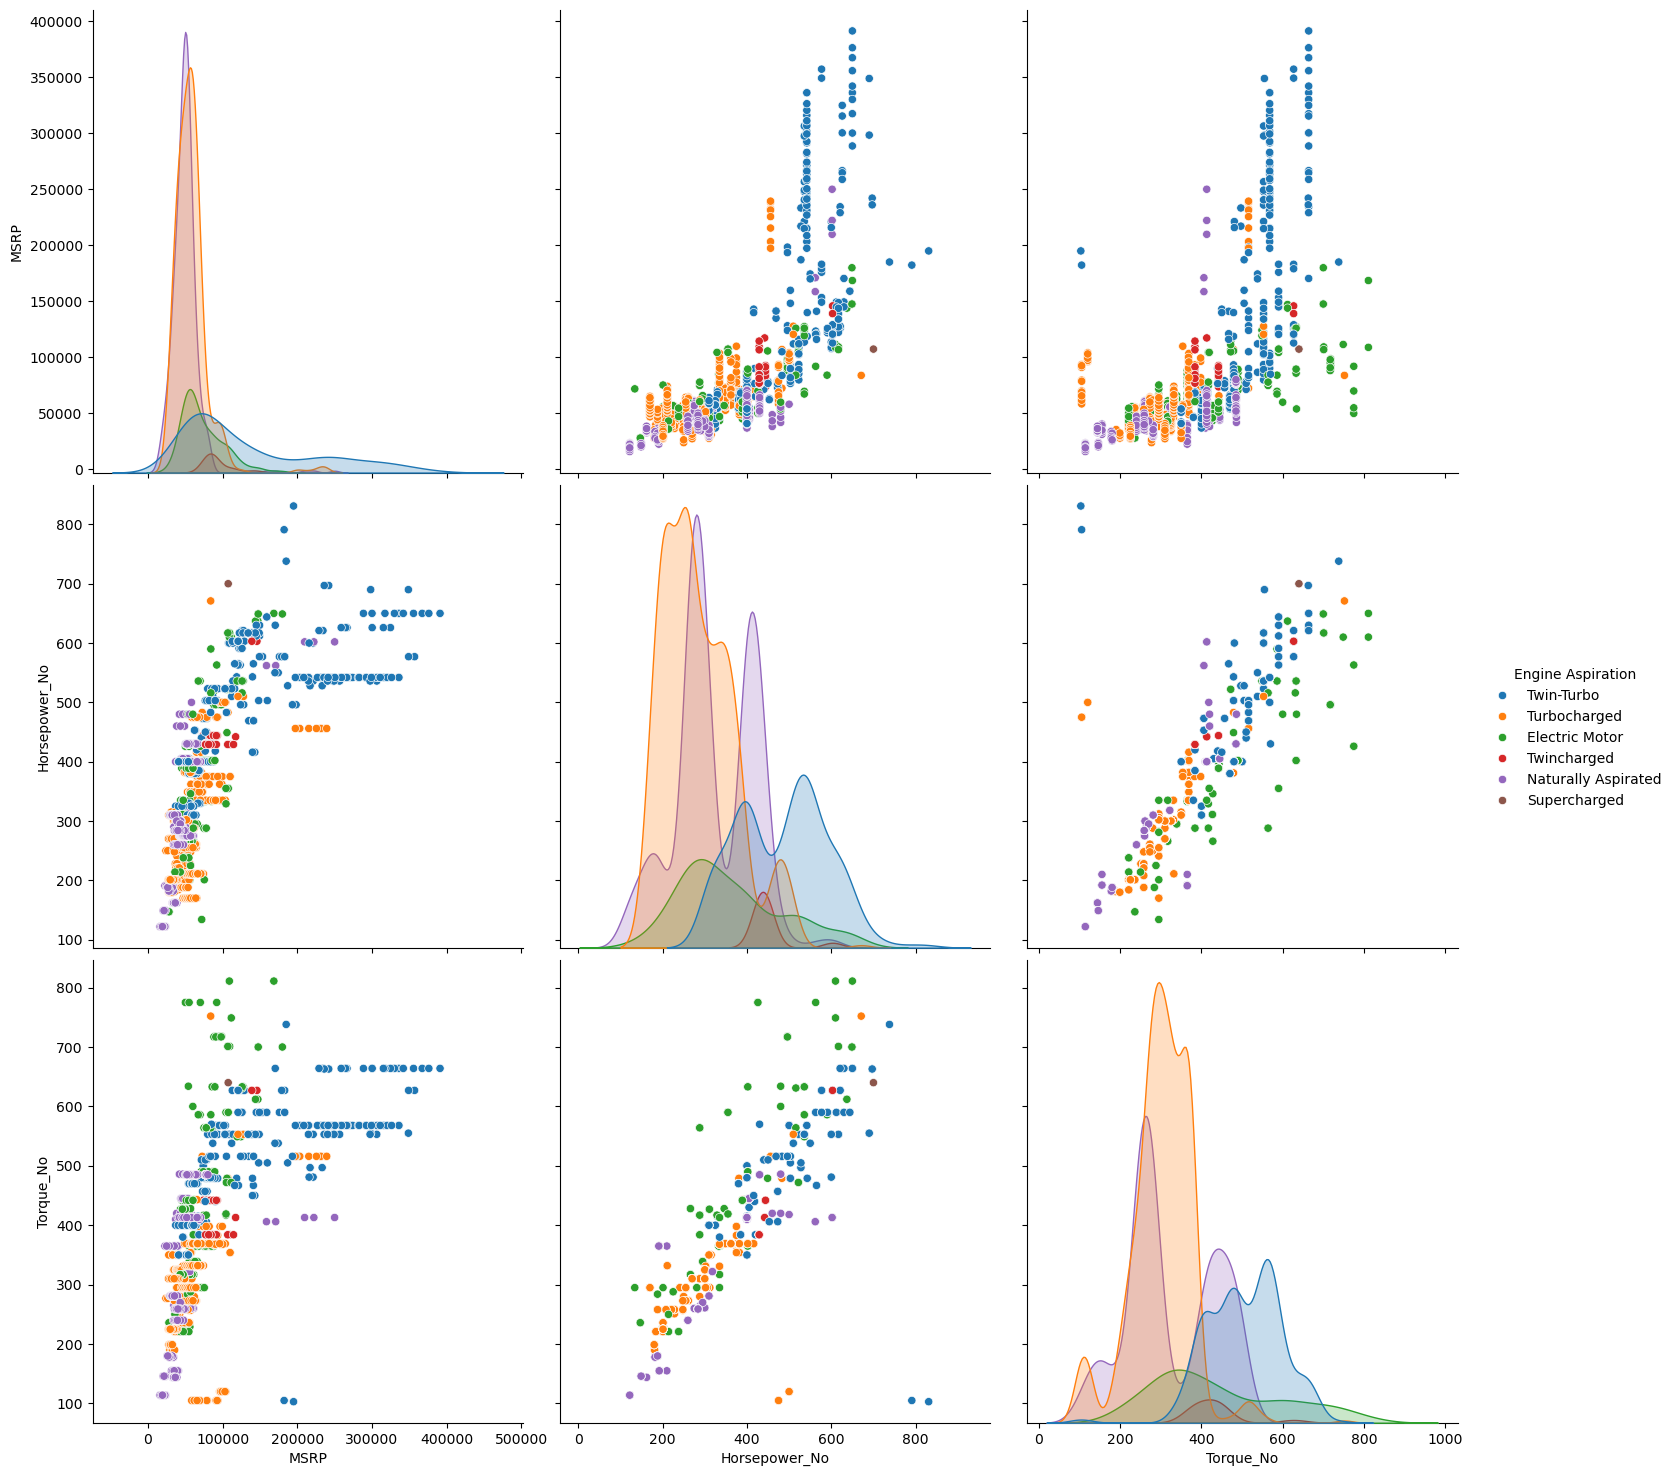

In [11]:
# Example 2 - Visualising a Subset of our data - important features
g = sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Engine Aspiration']], hue = 'Engine Aspiration', height = 5)

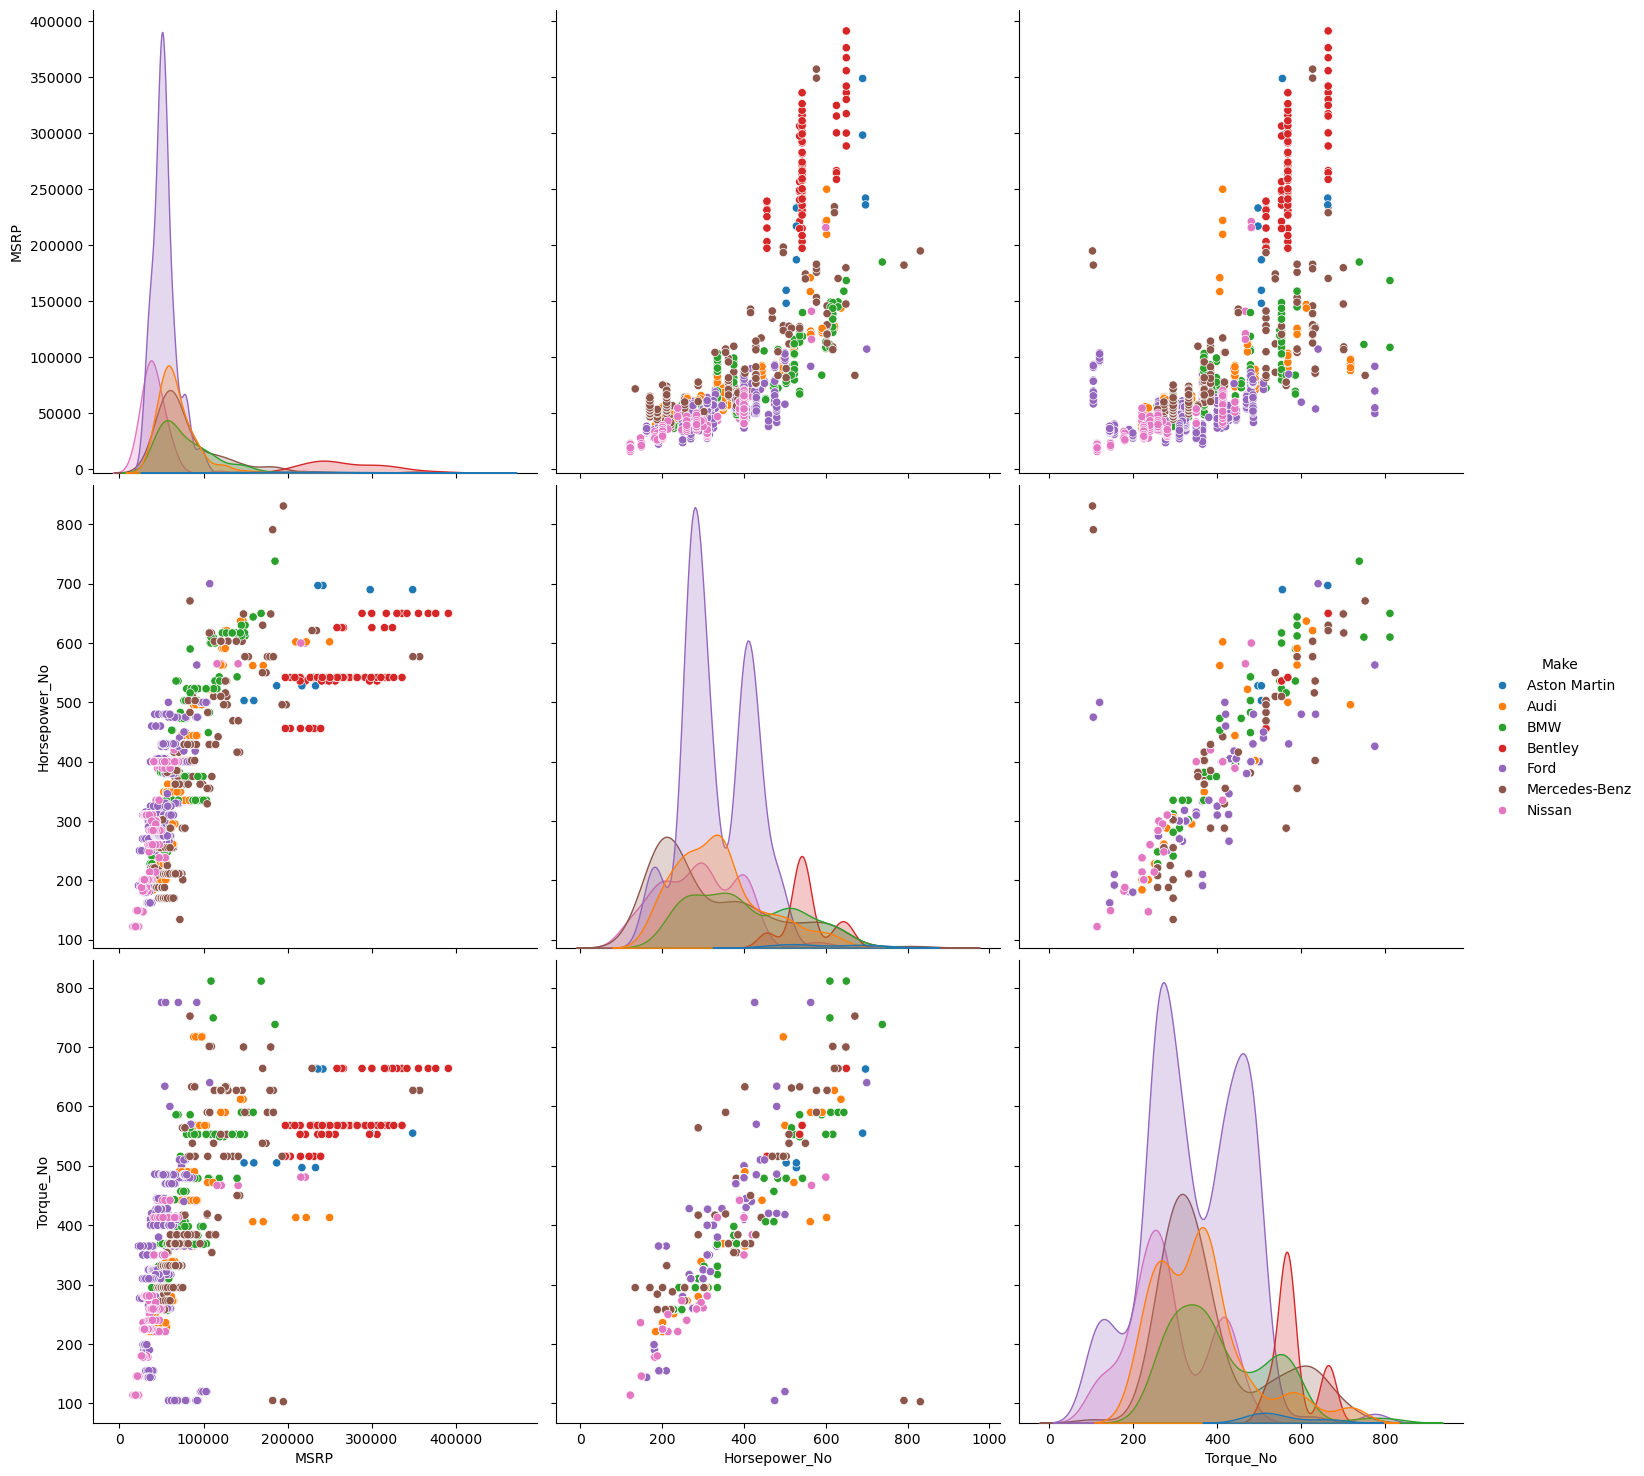

In [10]:
# Example 3 - Visualising a Subset of our data - important features
g = sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']], hue = 'Make', height = 5) #, kind="reg")
# test = car_data[car_data['Make'].isin(['Audi','BMW','Mercedes-Benz'])]
# g = sns.pairplot(test[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']], hue = 'Make', height = 5, kind="reg")

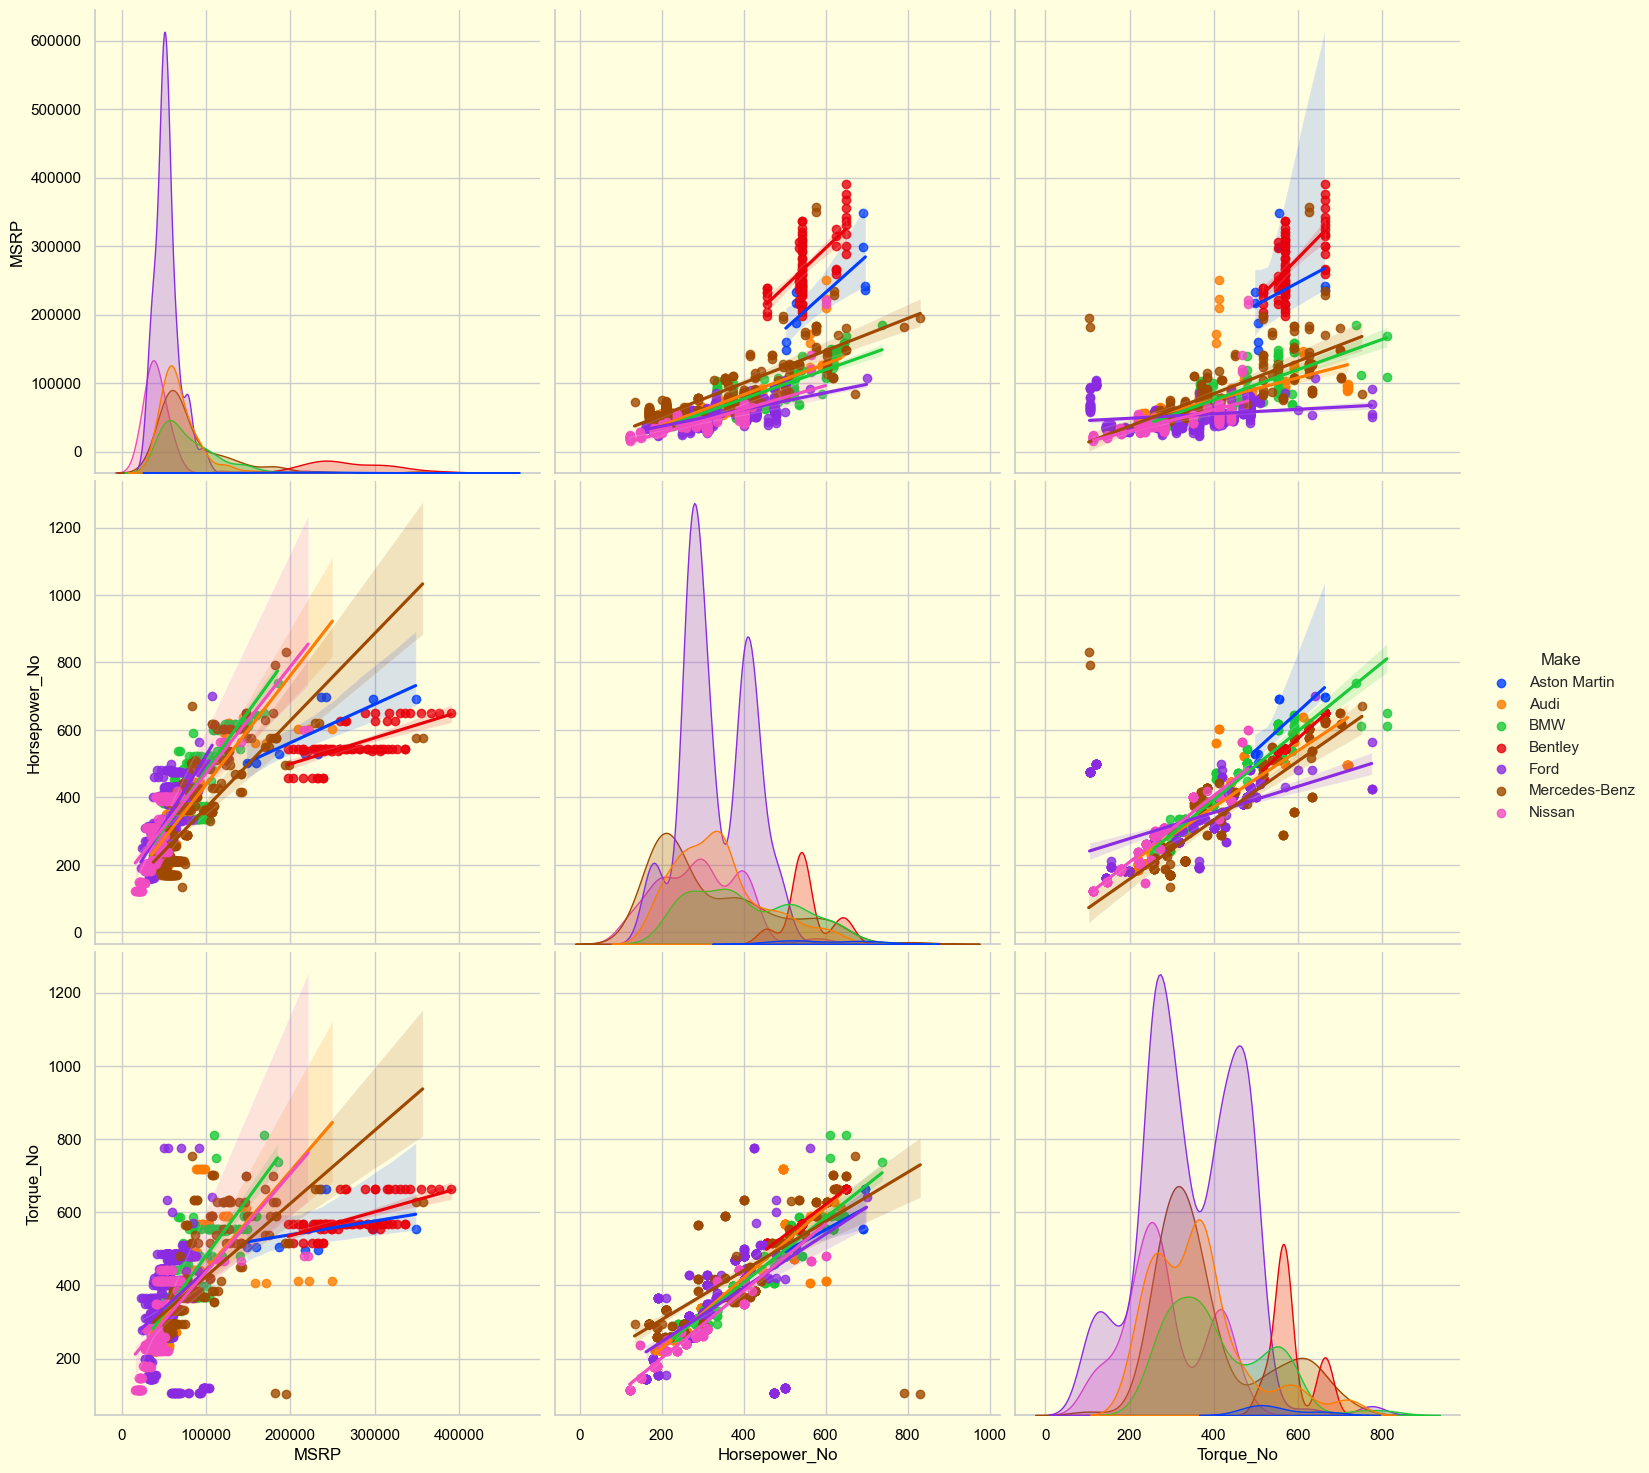

In [11]:
# Set the background style to light yellow
sns.set(style="whitegrid")
plt.rcParams['figure.facecolor'] = '#ffffe0'  # Light yellow for the figure background
plt.rcParams['axes.facecolor'] = '#ffffe0'  # Light yellow for the axes background

# Create the pairplot
g = sns.pairplot(
    car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']],
    hue='Make',
    height=5,
    palette="bright", kind="reg"
)

# Adjust the color of the labels and ticks to ensure readability
for ax in g.axes.flatten():
    ax.set_facecolor('#ffffe0')  # Set the facecolor of each subplot
    ax.tick_params(colors='black')  # Set tick color to black
    ax.xaxis.label.set_color('black')  # Set x-axis label color to black
    ax.yaxis.label.set_color('black')  # Set y-axis label color to black
    ax.title.set_color('black')  # Set title color to black if applicable

plt.show()

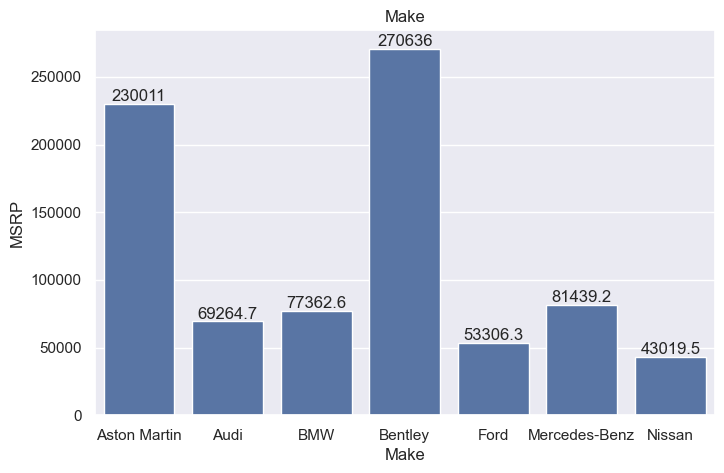

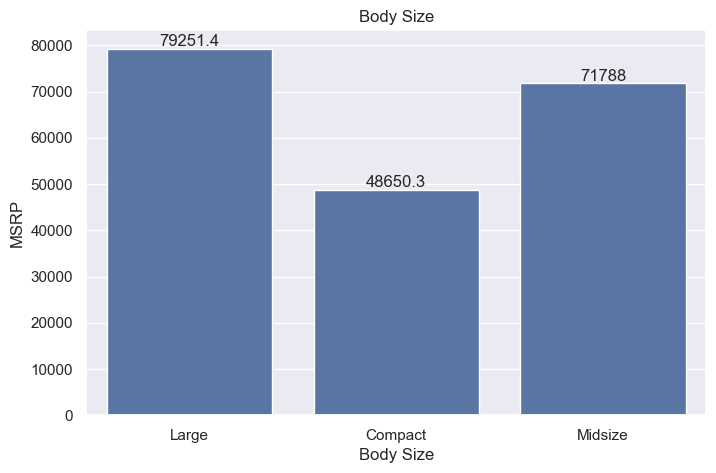

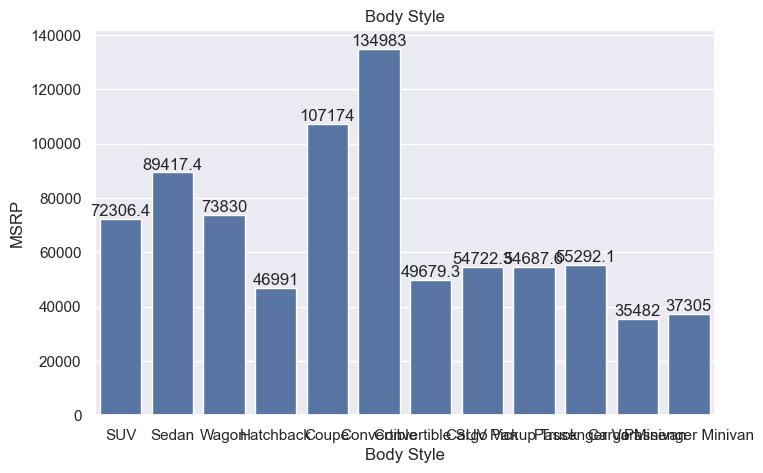

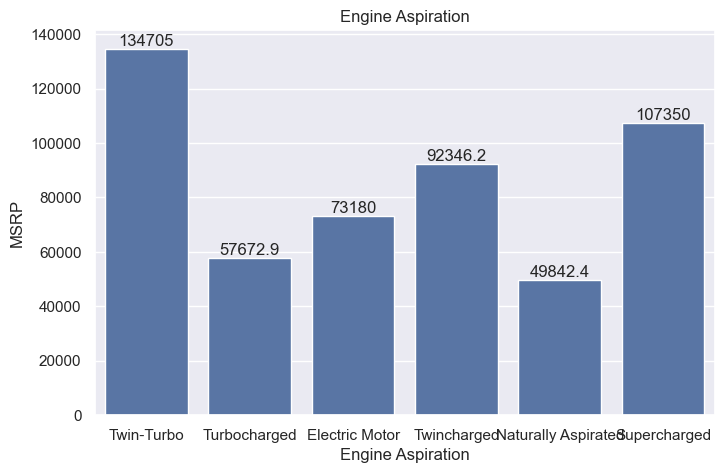

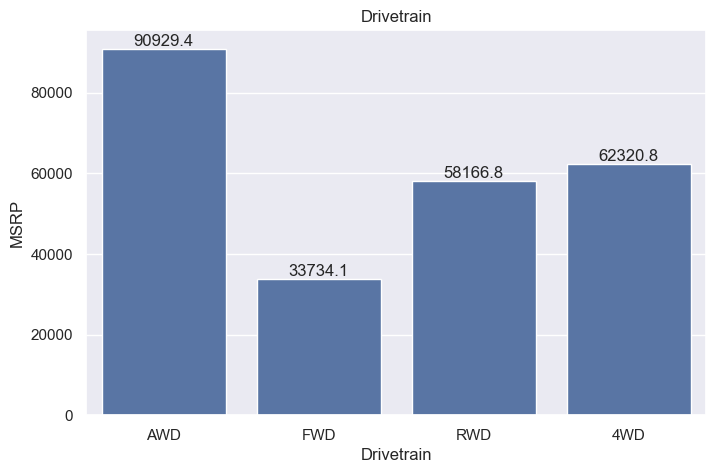

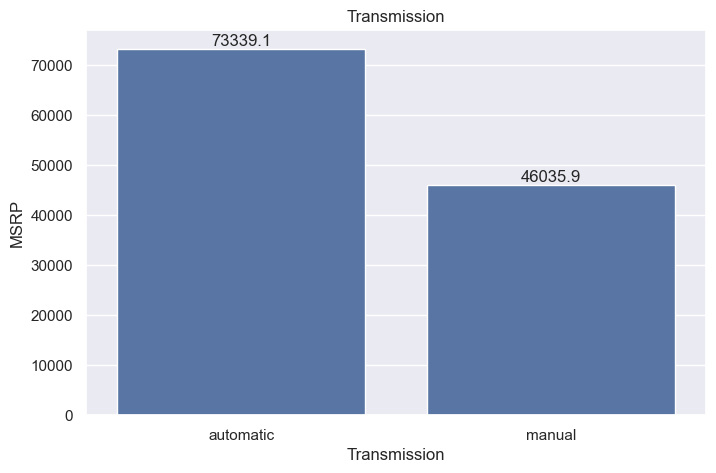

In [12]:
# visualizing the categorical values

categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="MSRP", data=car_data, errorbar=('ci', False)) #, hue = 'Model')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

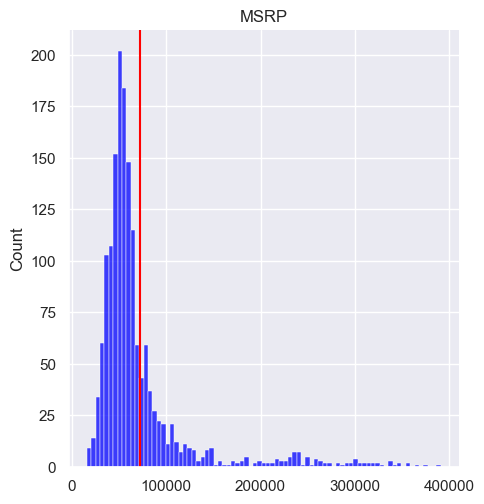

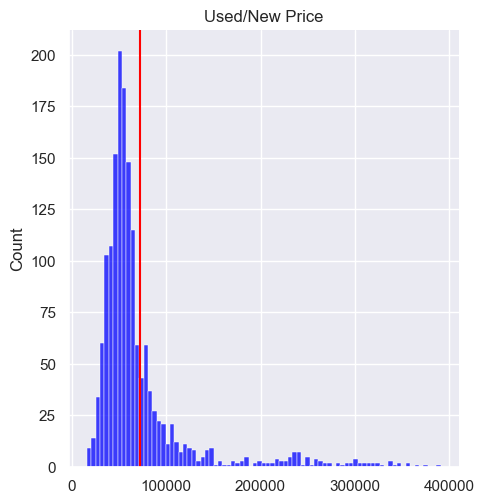

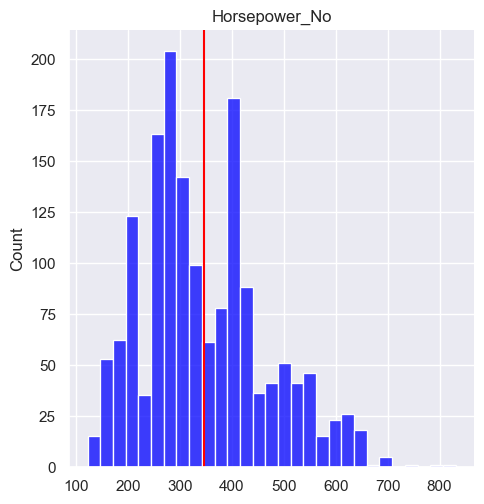

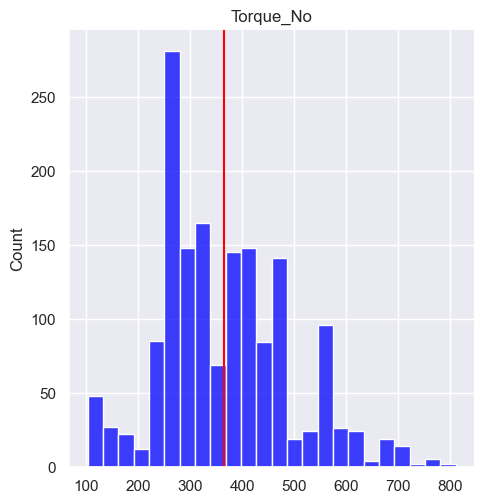

In [13]:
# Investigating the distribution of all fields, adding the mean

n_variables = ['MSRP','Used/New Price','Horsepower_No','Torque_No']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for n in n_variables:
    x = car_data[n].values
    sns.displot(x, color = 'blue');

    # Calculating the mean
    mean = car_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

The meadian is:  55945.0


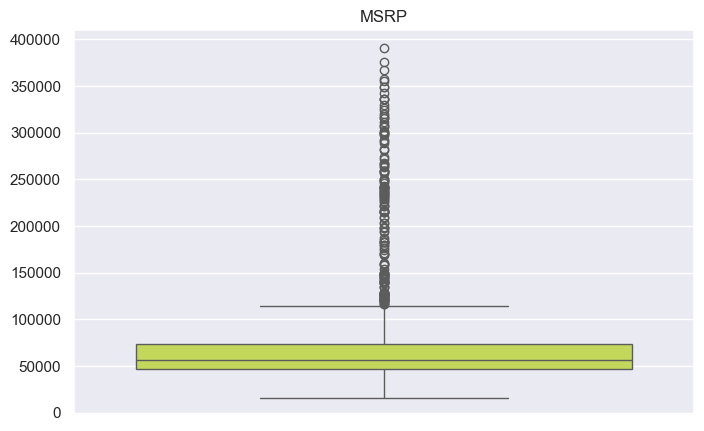

The meadian is:  55945.0


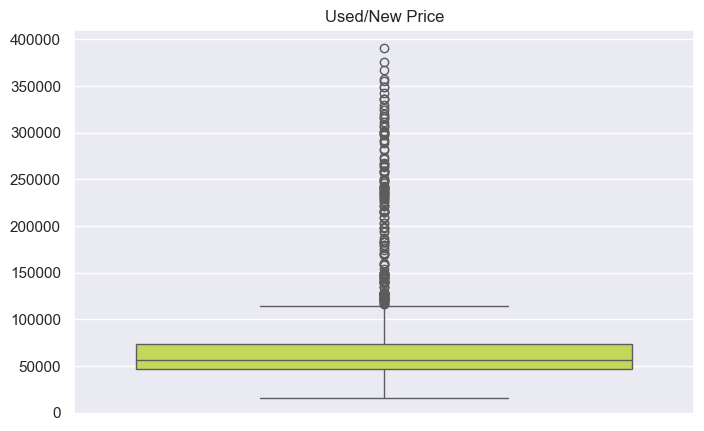

The meadian is:  325.0


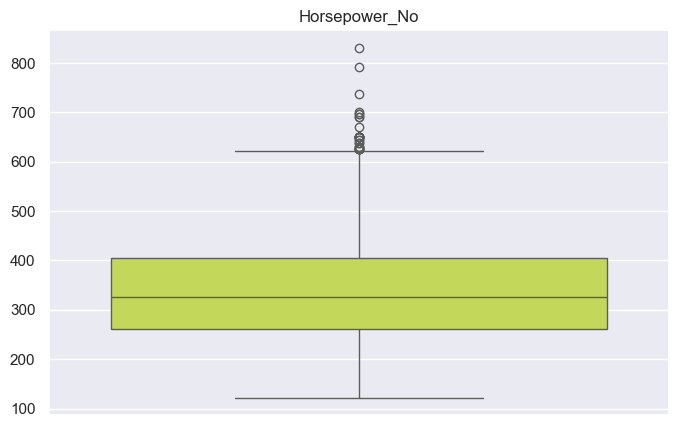

The meadian is:  350.0


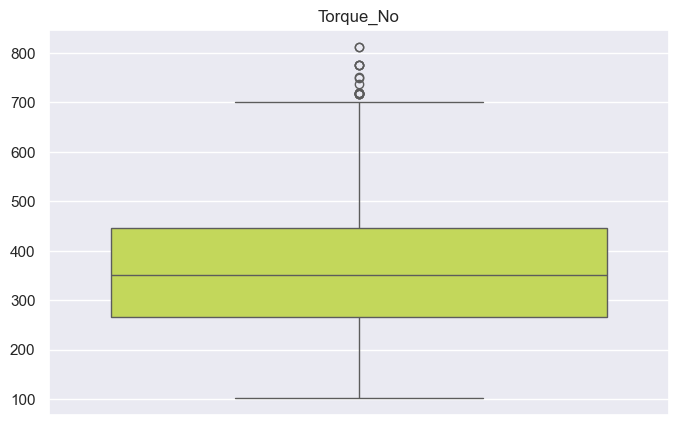

In [ ]:
# Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = car_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The median is: ', car_data[c].median())
    plt.title(c)
    plt.show()

c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


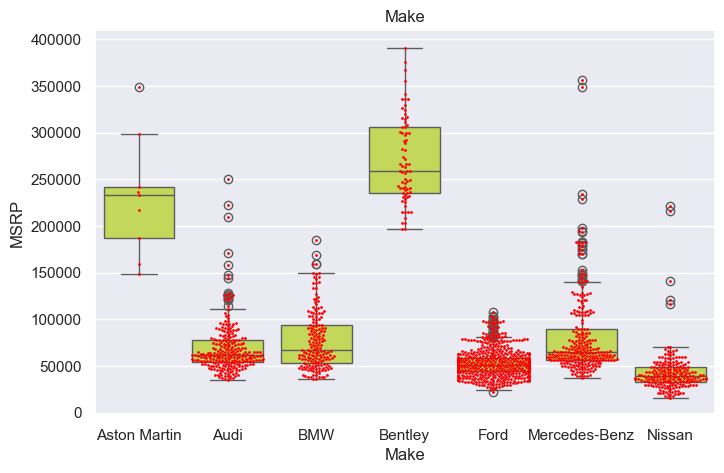

c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


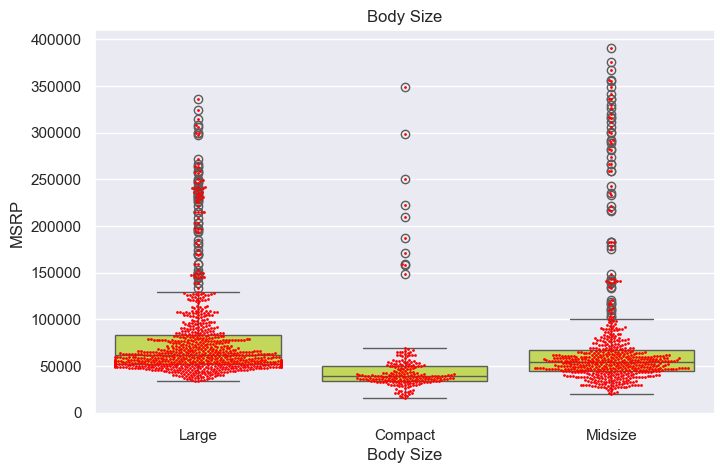

c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.0% of the p

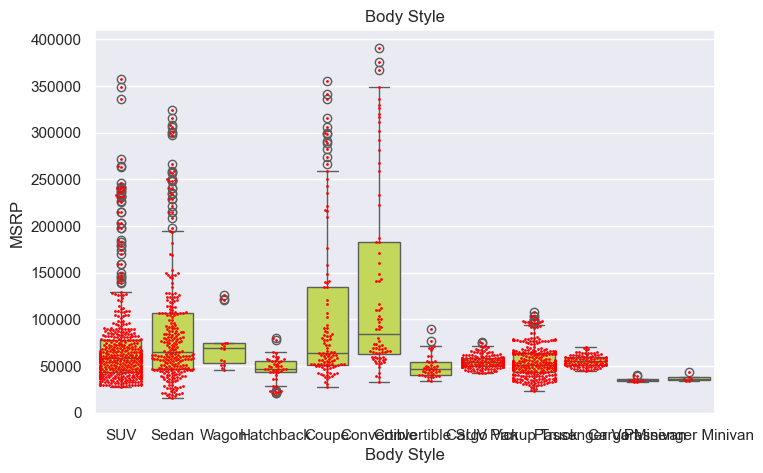

c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


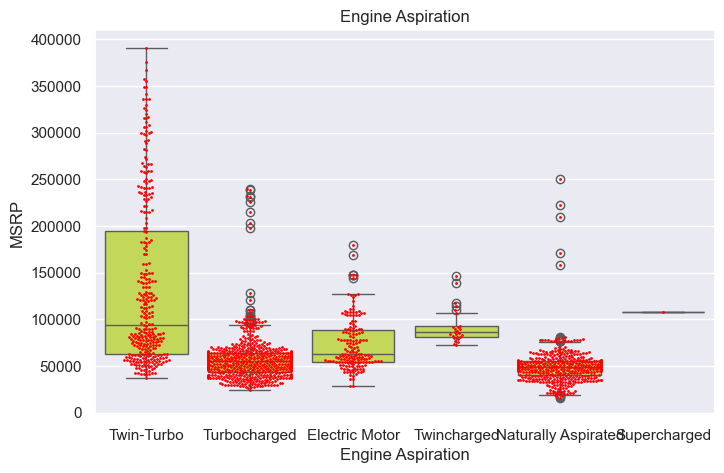

c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


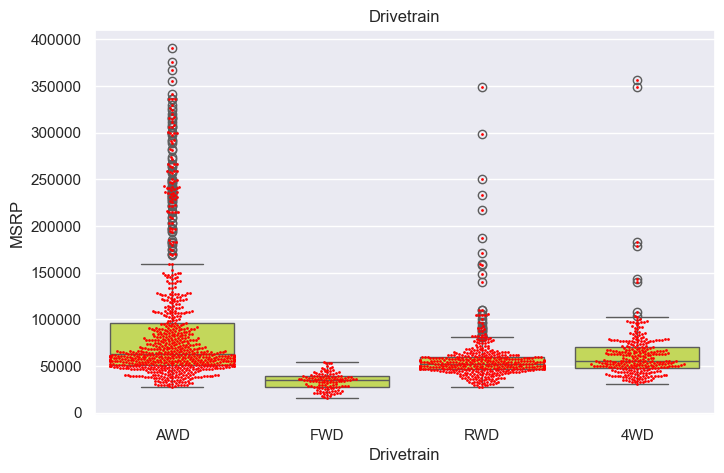

c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anjali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


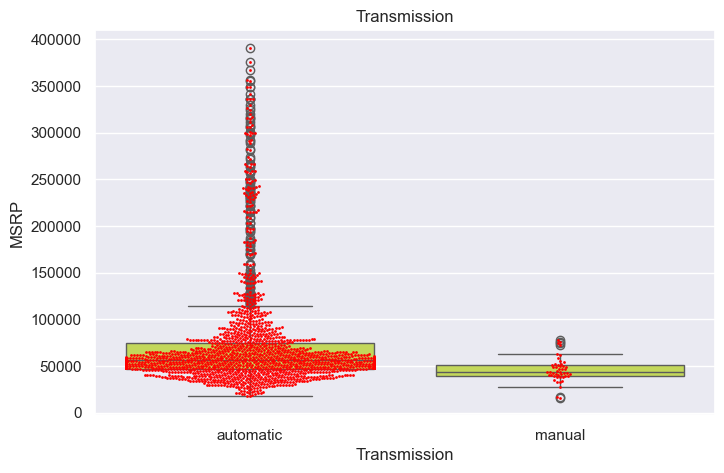

In [17]:
# Investigating the distribution of MSRP by categorical variables - by data points

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="MSRP", data=car_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="MSRP", data=car_data, color="red", s=2)
    plt.title(c)
    plt.show()

### 4.5. Preparing the final DF

In [18]:
# dropping the columns we do not need
new_car_data = car_data.drop(['index', 'Model','Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)

# Making categorical variables into numeric representation
new_car_data = pd.get_dummies(new_car_data, columns = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission'])

new_car_data.head()

,MSRP,Horsepower_No,Torque_No,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,Body Size_Compact,Body Size_Large,Body Size_Midsize,Body Style_Cargo Minivan,Body Style_Cargo Van,Body Style_Convertible,Body Style_Convertible SUV,Body Style_Coupe,Body Style_Hatchback,Body Style_Passenger Minivan,Body Style_Passenger Van,Body Style_Pickup Truck,Body Style_SUV,Body Style_Sedan,Body Style_Wagon,Engine Aspiration_Electric Motor,Engine Aspiration_Naturally Aspirated,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False
1,35800.0,201.0,221.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False
2,37800.0,201.0,221.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False
3,41400.0,201.0,221.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False
4,39400.0,201.0,221.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False


### 4.6. Feature Importances

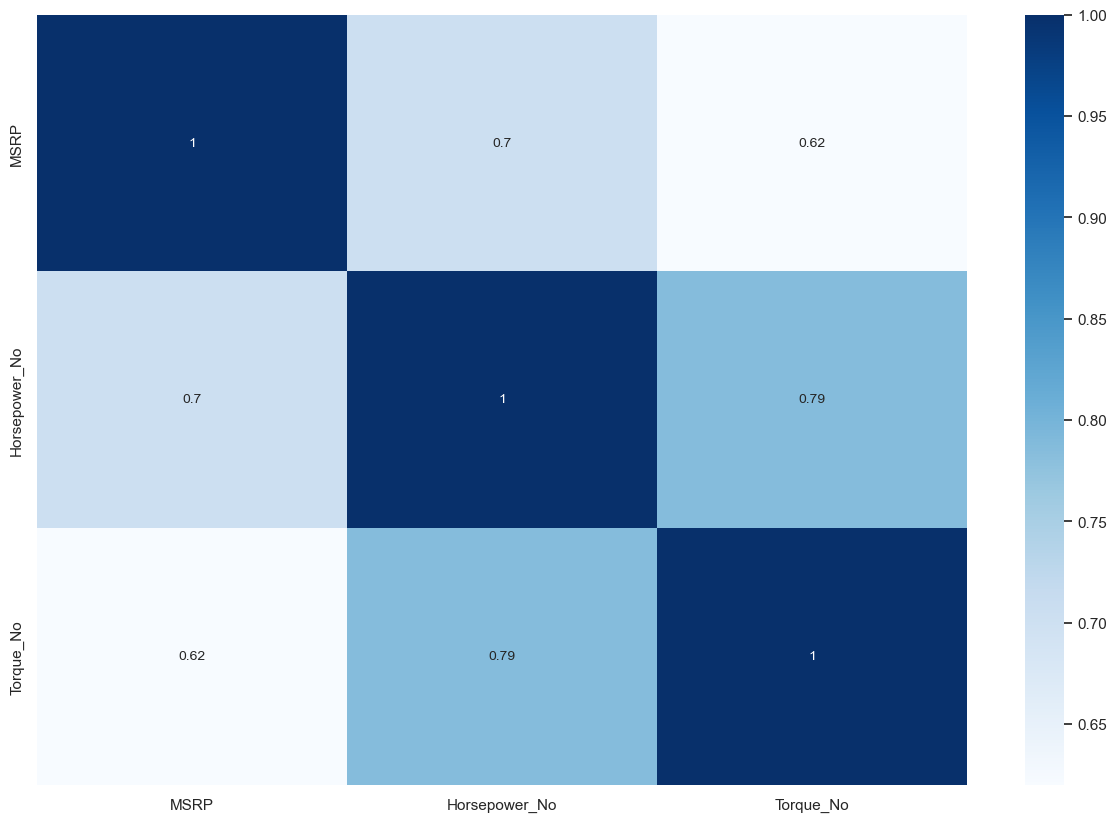

In [19]:
## Correlations with Heatmap

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['MSRP','Horsepower_No','Torque_No']

pc = new_car_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

### Feature Importance

Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests)
- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature
- More info: https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [20]:
# Split the data into X & y

X = new_car_data.drop(['MSRP'], axis = 1).values
X_columns = new_car_data.drop(['MSRP'], axis = 1)
y = new_car_data['MSRP'].astype(int)

print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(1610, 36)
(1610,)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [21]:
# Calculating FI
for i, column in enumerate(new_car_data.drop('MSRP', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Horsepower_No:, 0.247
Importance of feature Torque_No:, 0.123
Importance of feature Make_Aston Martin:, 0.000
Importance of feature Make_Audi:, 0.023
Importance of feature Make_BMW:, 0.014
Importance of feature Make_Bentley:, 0.013
Importance of feature Make_Ford:, 0.124
Importance of feature Make_Mercedes-Benz:, 0.021
Importance of feature Make_Nissan:, 0.006
Importance of feature Body Size_Compact:, 0.021
Importance of feature Body Size_Large:, 0.043
Importance of feature Body Size_Midsize:, 0.032
Importance of feature Body Style_Cargo Minivan:, 0.001
Importance of feature Body Style_Cargo Van:, 0.025
Importance of feature Body Style_Convertible:, 0.007
Importance of feature Body Style_Convertible SUV:, 0.001
Importance of feature Body Style_Coupe:, 0.008
Importance of feature Body Style_Hatchback:, 0.000
Importance of feature Body Style_Passenger Minivan:, 0.001
Importance of feature Body Style_Passenger Van:, 0.001
Importance of feature Body Style_Pickup Truck

,index,Variable,Feature Importance Score
0,0,Horsepower_No,0.246967
1,6,Make_Ford,0.123919
2,1,Torque_No,0.122594
3,27,Engine Aspiration_Turbocharged,0.087128
4,10,Body Size_Large,0.042774
5,21,Body Style_SUV,0.032605
6,11,Body Size_Midsize,0.031677
7,33,Drivetrain_RWD,0.031109
8,25,Engine Aspiration_Naturally Aspirated,0.028327
9,30,Drivetrain_4WD,0.028094


## 5. Splitting the Raw Data - Hold-out validation

In [22]:
# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(1288, 36)
(322, 36)
(1288,)
(322,)


## 6. Running Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Training the Regression
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
all_df_predict = lm.predict(X)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [25]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The Accuracy  on the training dataset is:  0.895779183244086
The Accuracy r2  on the training dataset prediction is:  0.895779183244086

The Accuracy  on the testing dataset is:  0.9198625302493006

The RMSE  on the training dataset is:  17421.7784480966
The RMSE  on the testing dataset is:  16534.594571973666

The MAE  on the training dataset is:  10599.011937878484
The MAE  on the testing dataset is:  11090.088349592685

Coefficients:  [ 2.22742940e+02 -1.89829669e+01  5.56034182e+04 -2.91161207e+04
 -3.66042366e+04  1.16226113e+05 -4.43839570e+04 -1.62628570e+04
 -4.54623600e+04  9.29404094e+01 -1.88423591e+02  9.54831816e+01
  6.09802309e+02  8.15969817e+03  1.42360673e+04  1.18332658e+02
  6.41353581e+02 -4.42967483e+03  6.15846845e+03  8.27078966e+03
 -1.77754623e+04 -5.15286113e+03 -3.70758421e+03 -7.12892964e+03
  6.29975752e+03  1.80270043e+03 -1.34977391e+04 -2.53004586e+02
  1.07576585e+04 -5.10937274e+03  4.83989383e+03 -3.37471593e+03
  4.33305973e+03 -5.79823762e+03  1.03

## 7. Storing Our Model & Results

In [26]:
# Storing the ML Model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lm, f)

In [27]:
# Storing the Feature Importances
final_fi['Feature Importance Score'] = final_fi['Feature Importance Score'].round(4)
final_fi = final_fi.head(27)
final_fi.to_excel("feature_importance.xlsx")

In [28]:
# Adding the predicted values
car_data['MSRP Predictions'] = all_df_predict

# Expoprting all the data with predictions
car_data.to_excel("data_with_pred.xlsx")

## 8. Streamlit App - Deployment

#### 8.1. Gathering the inputs

In [29]:
# Funtion to gather all of our data

# Feature selection on sidebar
def get_user_input():
    horsepower = st.sidebar.number_input('Horsepower (No)', min_value=0, max_value=1000, step=1, value=300)
    torque = st.sidebar.number_input('Torque (No)', min_value=0, max_value=1500, step=1, value=400)
    
    make = st.sidebar.selectbox('Make', ['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Ford', 'Mercedes-Benz', 'Nissan'])
    body_size = st.sidebar.selectbox('Body Size', ['Compact', 'Large', 'Midsize'])
    body_style = st.sidebar.selectbox('Body Style', [
        'Cargo Minivan', 'Cargo Van', 'Convertible', 'Convertible SUV', 'Coupe', 'Hatchback', 
        'Passenger Minivan', 'Passenger Van', 'Pickup Truck', 'SUV', 'Sedan', 'Wagon'
    ])
    engine_aspiration = st.sidebar.selectbox('Engine Aspiration', [
        'Electric Motor', 'Naturally Aspirated', 'Supercharged', 'Turbocharged', 'Twin-Turbo', 'Twincharged'
    ])
    drivetrain = st.sidebar.selectbox('Drivetrain', ['4WD', 'AWD', 'FWD', 'RWD'])
    transmission = st.sidebar.selectbox('Transmission', ['automatic', 'manual'])
    
    user_data = {
        'Horsepower_No': horsepower,
        'Torque_No': torque,
        f'Make_{make}': 1,
        f'Body Size_{body_size}': 1,
        f'Body Style_{body_style}': 1,
        f'Engine Aspiration_{engine_aspiration}': 1,
        f'Drivetrain_{drivetrain}': 1,
        f'Transmission_{transmission}': 1,
    }
    return user_data

user_data = get_user_input()
user_data



2025-07-20 14:35:22.741 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-07-20 14:35:23.864 
  command:

    streamlit run c:\Users\Anjali\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


{'Horsepower_No': 300,
 'Torque_No': 400,
 'Make_Aston Martin': 1,
 'Body Size_Compact': 1,
 'Body Style_Cargo Minivan': 1,
 'Engine Aspiration_Electric Motor': 1,
 'Drivetrain_4WD': 1,
 'Transmission_automatic': 1}

#### 8.2. Transforming the Inputs

In [30]:
# Transform the input into the required format
def prepare_input(data, feature_list):
    input_data = {feature: data.get(feature, 0) for feature in feature_list}
    return np.array([list(input_data.values())])

# Feature list (same order as used during model training)
features = [
    'Horsepower_No', 'Torque_No', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
    'Make_Ford', 'Make_Mercedes-Benz', 'Make_Nissan', 'Body Size_Compact', 'Body Size_Large',
    'Body Size_Midsize', 'Body Style_Cargo Minivan', 'Body Style_Cargo Van', 
    'Body Style_Convertible', 'Body Style_Convertible SUV', 'Body Style_Coupe', 
    'Body Style_Hatchback', 'Body Style_Passenger Minivan', 'Body Style_Passenger Van',
    'Body Style_Pickup Truck', 'Body Style_SUV', 'Body Style_Sedan', 'Body Style_Wagon',
    'Engine Aspiration_Electric Motor', 'Engine Aspiration_Naturally Aspirated',
    'Engine Aspiration_Supercharged', 'Engine Aspiration_Turbocharged',
    'Engine Aspiration_Twin-Turbo', 'Engine Aspiration_Twincharged', 
    'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 
    'Transmission_automatic', 'Transmission_manual']

# new_car_data.columns

# array of inputs
input_array = prepare_input(user_data, features)
input_array

array([[300, 400,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   1,   0]])

#### 8.3. Making the Prediction

In [31]:
# prediction
prediction = lm.predict(input_array)
prediction

array([161260.2364456])

#### 8.4. Creating the Bar Graph

In [32]:
# creating our Bar chart

# Sort feature importance DataFrame by 'Feature Importance Score'
final_fi_sorted = final_fi.sort_values(by='Feature Importance Score', ascending=True)

# Create interactive bar chart with Plotly
fig = px.bar(
    final_fi_sorted,
    x='Feature Importance Score',
    y='Variable',
    orientation='h',
    title="Feature Importance",
    labels={'Feature Importance Score': 'Importance', 'Variable': 'Feature'},
    text='Feature Importance Score',
    color_discrete_sequence=['#48a3b4']  # Custom bar color
)
fig.update_layout(
    xaxis_title="Feature Importance Score",
    yaxis_title="Variable",
    template="plotly_white",
    height=500
)
# st.plotly_chart(fig, use_container_width=True)

fig.show()

#### 8.5. Creating the APP

In [34]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
from PIL import Image

# Page configuration
st.set_page_config(layout="wide")

# Load your pre-trained model
with open('linear_model.pkl', 'rb') as f:
    lm2 = pickle.load(f)

# Load feature importance from an Excel file
def load_feature_importance(file_path):
    return pd.read_excel(file_path)

# Load the feature importance DataFrame
final_fi = load_feature_importance("feature_importance.xlsx")  # Replace with your file path

# Sidebar setup
image_sidebar = Image.open('Pic 1.png')  # Replace with your image file
st.sidebar.image(image_sidebar, use_column_width=True)
st.sidebar.header('Vehicle Features')

# Feature selection on sidebar
def get_user_input():
    horsepower = st.sidebar.number_input('Horsepower (No)', min_value=0, max_value=1000, step=1, value=300)
    torque = st.sidebar.number_input('Torque (No)', min_value=0, max_value=1500, step=1, value=400)
    
    make = st.sidebar.selectbox('Make', ['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Ford', 'Mercedes-Benz', 'Nissan'])
    body_size = st.sidebar.selectbox('Body Size', ['Compact', 'Large', 'Midsize'])
    body_style = st.sidebar.selectbox('Body Style', [
        'Cargo Minivan', 'Cargo Van', 'Convertible', 'Convertible SUV', 'Coupe', 'Hatchback', 
        'Passenger Minivan', 'Passenger Van', 'Pickup Truck', 'SUV', 'Sedan', 'Wagon'
    ])
    engine_aspiration = st.sidebar.selectbox('Engine Aspiration', [
        'Electric Motor', 'Naturally Aspirated', 'Supercharged', 'Turbocharged', 'Twin-Turbo', 'Twincharged'
    ])
    drivetrain = st.sidebar.selectbox('Drivetrain', ['4WD', 'AWD', 'FWD', 'RWD'])
    transmission = st.sidebar.selectbox('Transmission', ['automatic', 'manual'])
    
    user_data = {
        'Horsepower_No': horsepower,
        'Torque_No': torque,
        f'Make_{make}': 1,
        f'Body Size_{body_size}': 1,
        f'Body Style_{body_style}': 1,
        f'Engine Aspiration_{engine_aspiration}': 1,
        f'Drivetrain_{drivetrain}': 1,
        f'Transmission_{transmission}': 1,
    }
    return user_data

# Top banner
image_banner = Image.open('Pic 2.png')  # Replace with your image file
st.image(image_banner, use_column_width=True)

# Centered title
st.markdown("<h1 style='text-align: center;'>Vehicle Price Prediction App</h1>", unsafe_allow_html=True)

# Split layout into two columns
left_col, right_col = st.columns(2)

# Left column: Feature Importance Interactive Bar Chart
with left_col:
    st.header("Feature Importance")
    
    # Sort feature importance DataFrame by 'Feature Importance Score'
    final_fi_sorted = final_fi.sort_values(by='Feature Importance Score', ascending=True)
    
    # Create interactive bar chart with Plotly
    fig = px.bar(
        final_fi_sorted,
        x='Feature Importance Score',
        y='Variable',
        orientation='h',
        title="Feature Importance",
        labels={'Feature Importance Score': 'Importance', 'Variable': 'Feature'},
        text='Feature Importance Score',
        color_discrete_sequence=['#48a3b4']  # Custom bar color
    )
    fig.update_layout(
        xaxis_title="Feature Importance Score",
        yaxis_title="Variable",
        template="plotly_white",
        height=500
    )
    st.plotly_chart(fig, use_container_width=True)

# Right column: Prediction Interface
with right_col:
    st.header("Predict Vehicle Price")
    
    # User inputs from sidebar
    user_data = get_user_input()

    # Transform the input into the required format
    def prepare_input(data, feature_list):
        input_data = {feature: data.get(feature, 0) for feature in feature_list}
        return np.array([list(input_data.values())])

    # Feature list (same order as used during model training)
    features = [
        'Horsepower_No', 'Torque_No', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
        'Make_Ford', 'Make_Mercedes-Benz', 'Make_Nissan', 'Body Size_Compact', 'Body Size_Large',
        'Body Size_Midsize', 'Body Style_Cargo Minivan', 'Body Style_Cargo Van', 
        'Body Style_Convertible', 'Body Style_Convertible SUV', 'Body Style_Coupe', 
        'Body Style_Hatchback', 'Body Style_Passenger Minivan', 'Body Style_Passenger Van',
        'Body Style_Pickup Truck', 'Body Style_SUV', 'Body Style_Sedan', 'Body Style_Wagon',
        'Engine Aspiration_Electric Motor', 'Engine Aspiration_Naturally Aspirated',
        'Engine Aspiration_Supercharged', 'Engine Aspiration_Turbocharged',
        'Engine Aspiration_Twin-Turbo', 'Engine Aspiration_Twincharged', 
        'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 
        'Transmission_automatic', 'Transmission_manual'
    ]

    # Predict button
    if st.button("Predict"):
        input_array = prepare_input(user_data, features)
        prediction = lm2.predict(input_array)
        st.subheader("Predicted Price")
        st.write(f"${prediction[0]:,.2f}")

# streamlit run Regr_model_cars.py
